# Electric Vehicles (EV) Battery Charging environment

This notebook describes the operation of the EVCharge environment, designed as a multi-agent scenario where the agents are charging stations that must meet the energy requirements of a previously-scheduled group of PEVs (Plug-in Electric Vehicles), constrained to a local power supply restriction, and a global restriction from the containing Load Area.

This code and plant are a Deep Learning implementation of the MPC approach described in this paper: 
https://www.researchgate.net/publication/337643000_Decentralised_Model_Predictive_Control_of_Electric_Vehicles_Charging

## Initialization

In [1]:
import numpy as np
import pandas as pd
from pev_battery_charge.envs.PEVBatteryCharge import PEVBatteryCharge
from pdb import set_trace
from pev_battery_charge.envs.config_pev import get_config 
from matplotlib import pyplot as plt

In [2]:
config = get_config(notebook=True)

In [3]:
env = PEVBatteryCharge(args=config)

AttributeError: 'PEVBatteryCharge' object has no attribute 'actions_last'

# GIF Generation

On the plot visualization, each step will show:
1. The power provided by each CS. 
2. The SOC for all vehicles. 

In [4]:
obs, _ = env.reset()

In [5]:
env.P_max

200

In [7]:
 env.total_timesteps

192

In [115]:
actions = [space.sample() for space in env.action_space]
obs, rewards, done, info, [] =  env.step(actions)
actions

[array([0.00462138], dtype=float32),
 array([0.7229346], dtype=float32),
 array([0.03050009], dtype=float32),
 array([0.10385289], dtype=float32)]

In [116]:
obs

[[0, 22, 200, True, 0, 24.0, 0.861908963881433],
 [0, 22, 200, True, 0, 4.0, 0.861908963881433],
 [0, 22, 200, True, 0, 14.0, 0.861908963881433],
 [0, 22, 200, False, 0, 87.0, 0.861908963881433]]

In [117]:
from time import sleep

obs = env.reset()
for _ in range(env.total_timesteps):
    #sleep(1)
    actions = [space.sample() for space in env.action_space]
    
    #set_trace()
    obs, rewards, done, info, [] =  env.step(actions)
    obs

In [119]:
obs

[[0, 22, 200, True, 0, -1.0, 1.716455414891243],
 [0, 22, 200, False, 0, -1.0, 1.716455414891243],
 [0, 22, 200, True, 0, -1.0, 1.716455414891243],
 [0, 22, 200, False, 0, -1.0, 1.716455414891243]]

In [6]:
obs

NameError: name 'obs' is not defined

It collects information available for the charging station to predict its next power value to apply.
It is formed by the following elements:
1. `cs.p_min`: Minimum CS power allowed
1. `cs.p_max`: Maximum CS power allowed
1. `area.P_max`: Maximum area load power allowed
1. `area.P_min`: Minimum area load power allowed
1. `cs.plugged`: Station plugged or not
1. `soc_remain`: $SOC$ level remaining (kWh)
1. `area.P`: Current agregated power of the area (kW)
1. `action_last`: Last applied action (Maybe)

Elements from 1 to 4 might vary over a simulation, but usually they not. 

[[0, 22, 200, False, 0, 183.0, 4.501166790723801],
 [0, 22, 200, False, 0, 183.0, 4.501166790723801],
 [0, 22, 200, False, 0, 183.0, 4.501166790723801],
 [0, 22, 200, False, 0, 183.0, 4.501166790723801]]

In [9]:
plt

NameError: name 'plt' is not defined

In [9]:
obs

[[0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 

In [10]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plug-in schedule

In [11]:
cs_schedule = pd.DataFrame(env.cs_schedule)
cs_schedule.iloc[30:50]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
30,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
32,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
33,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
34,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
35,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
37,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
38,4,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
39,4,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## 4 Agents, 10 PEVs

In [12]:
config.num_agents = 4
config.n_pevs = 10
env = PEVBatteryCharge(args=config)
#env.__dict__

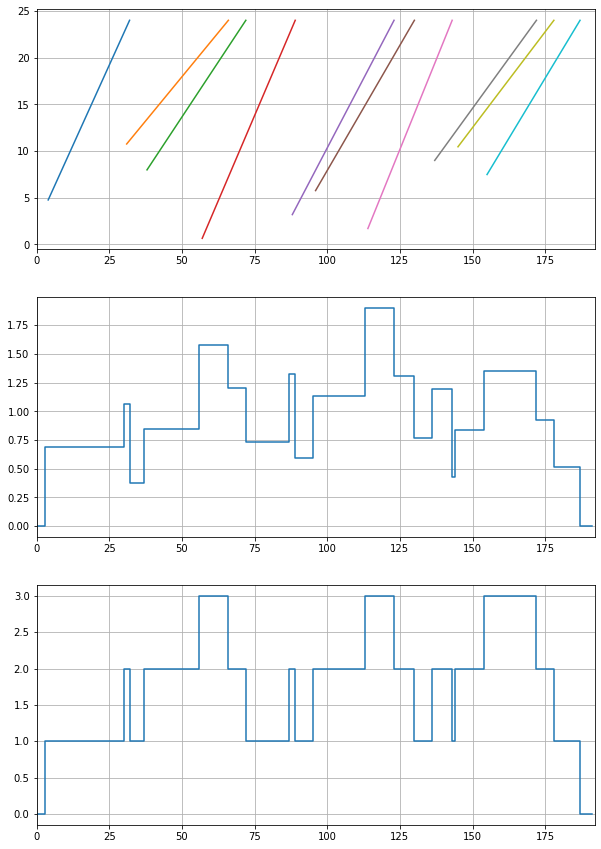

In [13]:
from time import sleep

for _ in range(10):
    #sleep(1)
    env.build_random_schedule()
    env.compute_greedy_charge()
    env.compute_power_ideal()
    env.compute_pev_plugin()
    env.plot_simulation(plots=[1,2,3])

In [14]:
cs_schedule = pd.DataFrame(env.cs_schedule)
cs_schedule.iloc[30:50]

,0,1,2,3
30,0,-1,-1,-1
31,0,1,-1,-1
32,0,1,-1,-1
33,-1,1,-1,-1
34,-1,1,-1,-1
35,-1,1,-1,-1
36,-1,1,-1,-1
37,-1,1,-1,-1
38,2,1,-1,-1
39,2,1,-1,-1
